# Modelos lineales de clasificación

> Se utiliza en análisis de datos categóricos

\begin{align*}
\end{align*} Para empezar, apliquemos los modelos `LogisticRegression` y `LinearSVC` al dataset modelo `forge`, y visualicemos el límite de decisión para ambos: 

In [8]:
# Importamos paquetes
import pandas as pd
import numpy as np
import matplotlib
import scipy as sp
import matplotlib.pyplot as plt
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

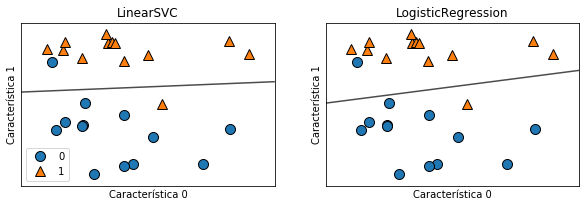

In [9]:
# Importamos forge dataset
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=10000),
                      LogisticRegression(
                          solver='liblinear')], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(
        clf, X, fill=False, eps=0.5,
        ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Característica 0")
    ax.set_ylabel("Característica 1")
axes[0].legend()
#Se ve que hay dos outliers, pero el modelo funciona bien en general en los dos casos

Puede verse que el límite de decisión es una línea recta que separa ambas clases. Cualquier punto encima de la línea será clasificado como perteneciente a la clase 1, mientras que puntos por debajo lo serán como clase 0.

Los dos límites son similares, y en ambos casos los algoritmos están utilizando regularización $L2$, que es lo mismo que hacía Ridge en el apartado anterior.

El parámetro que determina la fuerza de regularización en ambos casos se llama $C$, donde valores altos de $C$ corresponden a una menor regularización. Es decir, con un valor alto de $C$ ambos modelos intentarán ajustarse a los datos de training lo mejor posible, mientras que con un valor bajo los modelos se centrarán en encontrar un vector coeficientes $w$ cercano a cero.

El efecto de diferentes valores de C en `LinearSCV` puede verse en los siguientes tres gráficos:

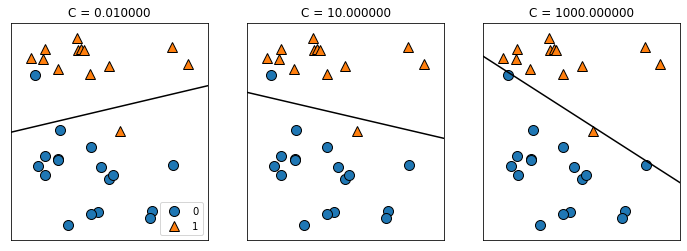

In [10]:
mglearn.plots.plot_linear_svc_regularization()
#Vamos a cambair el parámetro C, que es un regularización L2
# Si sube C, ajustamos más al Training entonces los pesos son más importantes y afectan más a la separación
# Si bajamos C, se reduce la importancia que tienen los pesos de las características

El el gráfico de la izquierda, tenemos un valor de $C$ muy pequeño correspondiente a una alta regularización. El modelo fuertemente regularizado elige una linea relativamente horizontal, errando en la clasificación de 2 puntos.

El gráfico central inclina la línea hacia el otro lado, y se ve que el modelo se enfoca más en los dos puntos incorrectamente clasificados.

Finalmente, en el gráfico de la derecha, el valor alto de $C$ hace que el límite de decisión se incline mucho, clasificando correctamente todos los puntos de la clase 0. Uno de los puntos de la clase 1 permanece incorrectamente clasificado, pero no es posible hacerlo mejor con un límite lineal. Este último modelo está sobreajustando los datos de entrenamiento.

Al igual que en el caso de regresión, los modelos de clasificación lineal pueden parecer muy limitados en espacios de bajas dimensiones. Sin embargo, son más potentes en dimensiones más altas y protegen bien contra el sobreajuste cuando se consideran más características.

Veamos cómo se comporta la regresión logística en el dataset de cáncer de mama:

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,
    stratify=cancer.target, random_state=42) #stratify para equilibrar los con o sin cancer
logreg = LogisticRegression(solver='liblinear').fit(
    X_train, y_train)
print("Training set score: {:.3f}"
      .format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}"
      .format(logreg.score(X_test, y_test)))
# El rendimiento es muy bueno, pero de ambos, entonces habría que comprobar varias cosas con parámetros

Training set score: 0.953
Test set score: 0.958


Un valor de $C=1$ da un rendimiento bastante bueno, con un 95% de precisión en ambos datasets. Pero si ambos están muy próximos, es posible que estemos subajustando. Vamos a incrementar el valor de $C$ buscando un modelo con más flexibilidad hacia los datos de entrenamiento:

In [16]:
logreg100 = LogisticRegression(
    solver='liblinear',C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(
    logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(
    logreg100.score(X_test, y_test)))

# Es muy parecido, ha subido un poco, eso quiere decir que nos hemos perdido algo aprendiendo más del training

Training set score: 0.972
Test set score: 0.965


Con $C=100$ tenemos más precisión en el dataset de entrenamiento, y también un poco más en el de test, lo que confirma nuestra intuición de que un modelo más complejo debería comportarse mejor.

Podemos investigar también qué ocurre si usamos un modelo aún más regularizado que el suministrado por defecto, haciendo que $C=0.01$:

In [17]:
# Prueba con C=0.01 
logreg001 = LogisticRegression(
    solver='liblinear', C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(
    logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(
    logreg001.score(X_test, y_test)))
# Es muy parecido, pero ha bajado un poco, también es lógico porque hemos dado menor importancia a los pesos.

Training set score: 0.934
Test set score: 0.930


Como era de esperar, moverse más en la escala de $C$ desde un modelo que ya desajustaba lo que hace es reducir la precisión con respecto a los valores de $C$ por defecto.

Finalmente, echemos un vistazo al os coeficientes aprendidos por el modelo con tres valores diferentes de $C$:

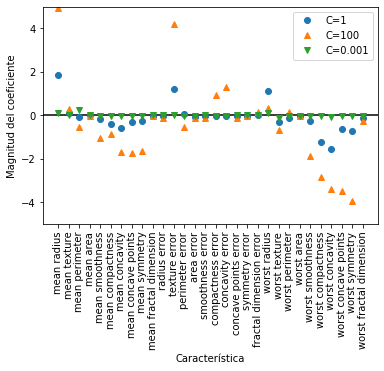

In [18]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),
           cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Característica")
plt.ylabel("Magnitud del coeficiente")
plt.legend()

# Se ve que Texture error y Mean radius son dos características importantes para
# predecir si una persona tiene cancer, y luego están
# worst concavity, worst compactness, también influyen pero menos.
# Si miramos a Mean perimeter, hay que tener cuidado!, porque cambiando el C, puede ser positivo o negativo,
# es decir pueden decir que tiene cancer o no y esto influencia en el modelo.
# Este modelo es menos interpretable, si lo que queremos interpretar mejor debemos ir
# a una regularización L1 (porque se cargan características) con la que puedes interpretar más cosas.

`LogisticRegression` aplica una regularización tipo $L2$ por defecto, y por lo tanto sus resultados son parecidos a los que se obtenían con la regresión Ridge más arriba. Una regularización más fuerte aproxima más los coeficientes a cero, aunque estos nunca llegan a anularse.

Si se miran los puntos en el gráfico con más detalle, se ven un efecto interesante en el tercer coeficiente, `mean perimeter`. Para $C=100$ y $C=1$, el coeficiente es negativo mientras que para $C=0.001$ es positivo, con una magnitud que es incluso mayor que para $C=1$. 

Al interpretar un modelo como este, uno puede pensar que el coeficiente nos dice la clase a la que está asociada una característica. Por ejemplo, se podría pensar que grandes magnitudes de `texture error` están relacionadas con que una muestra sea maligna. Sin embargo, el cambio de signo `mean perimeter` significa que dependiendo del modelo en el que nos enfoquemos, un valor alto de `mean perimeter` podría ser tanto un indicativo de benigno como de maligno.

La conclusión es que las interpretaciones de los coeficientes en los modelos lineales no pueden realizarse a la ligera.

Si quisiésemos tener un modelo más fácilmente interpretable, una regularización de tipo $L1$ ayuda, ya que limita al modelo a usar sólo algunas características. He aquí un gráfico de los coeficientes y las precisiones para un modelo $L1$:

Precisión (Training) para Logistic Reg. L1 con C=0.001: 0.91
Precisión (Test) para Logistic Reg. L1 con C=0.001: 0.92
Precisión (Training) para Logistic Reg. L1 con C=1.000: 0.96
Precisión (Test) para Logistic Reg. L1 con C=1.000: 0.96
Precisión (Training) para Logistic Reg. L1 con C=100.000: 0.99
Precisión (Test) para Logistic Reg. L1 con C=100.000: 0.98


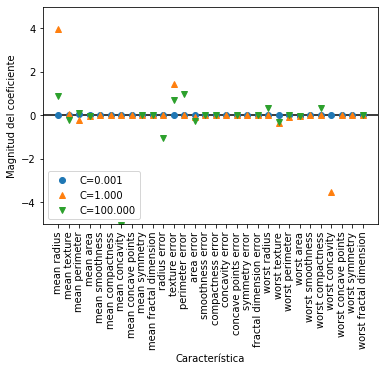

In [19]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(
        max_iter=100000, C=C, solver='liblinear', penalty="l1"
    ).fit(X_train, y_train)
    print("Precisión (Training) para Logistic Reg. L1 con C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Precisión (Test) para Logistic Reg. L1 con C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(
    range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Característica")
plt.ylabel("Magnitud del coeficiente")

#Aquí podemos ver más claramente las características que más afectan a la precisión, es mucho más interpretable

plt.ylim(-5, 5)
plt.legend(loc=3)

Como puede verse, hay muchos paralelismos entre los modelos lineales de clasificación binaria y los de regresión. Como en la regresión la diferencia fundamental entre modelos es el parámetro de penalización, que influencia la regularización y si el modelo usa todas o sólo una parte de las características.

### Modelos lineales de clasificación multiclase
\begin{align*}
\end{align*}
Muchos modelos de clasificación lineal sólo funcionan con clasificaciones binarias, y no extienden a clasificación multicategoría (la regresión logística es una excepción).

Para poder extender modelos binarios a un escenario multiclase, una técnica empleada con frecuencia es realizar una serie de entrenamientos *one-vs-rest*. Con esta técnica, se entrena un modelo binario para cada clase frente al resto, resultando en tantos modelos binario como clases haya. Para hacer una predicción, tendrán que ejecutarse todos los clasificadores binarios sobre la muestra en cuestión. El clasificador que tenga el score más alto marca cuál es la clase devuelta como resultado de la predicción.

![one-vs-rest](images/one-vs-rest.jpeg)

Como ya se ha mencionado en la presentación, la regresión logística multiclase es diferente matemáticamente de la aproximación *one-vs-rest*, pero también se obtiene como resultado  un vector de coeficientes y un término $b$ por clase, con lo que se usa el mismo métdo para hacer la predicción de un coeficiente.

Vamos a aplicar la técnica *one-vs-rest* a un dataset sencillo con tres clases. Usamos aquí un dataset bidimensional, al que cada clase se obtiene a partir de datos de una distribución normal:

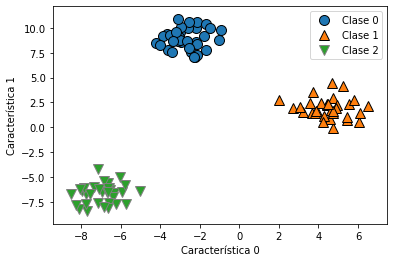

In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")
plt.legend(["Clase 0", "Clase 1", "Clase 2"])

Con estos datos, entrenamos un modelo `LinearSVC`:

In [23]:
# Instanciamos un modelo LinearSCV
linear_svm = LinearSVC().fit(X, y)
print("dimensiones coeficientes: ", linear_svm.coef_.shape)
print("Dimensiones término b: ", linear_svm.intercept_.shape)
# Nos muestra que hay tres hiperplanos para diferenciar los grupos

dimensiones coeficientes:  (3, 2)
Dimensiones término b:  (3,)


`coef_` tiene dimensiones (3,2), 3 filas y dos columnas, lo que significa que cada fila contiene el vector de coeficientes de cada clase, y las columnas el valor del coeficiente para una de las dos características presentes. El término `intercept` es un array unidimensional (vector), con la $b$ de cada clase.

Visualicemos las lineas frontera para cada clasificador binario:

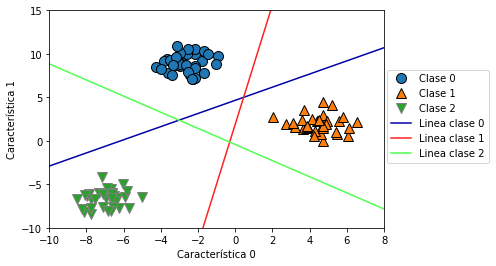

In [24]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# Creamos puntos en una línea en el intervalo [-15, 15]
line = np.linspace(-15, 15)

# Iteramos para pintar las lineas con colores distintos
for coef, intercept, color in zip(
    linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")
plt.legend(['Clase 0', 'Clase 1', 'Clase 2', 'Linea clase 0', 'Linea clase 1',
            'Linea clase 2'], loc=(1.01, 0.3))
# Se ven las fronteras de decisión de las clases

Puede verse que las muestras de clase 0 están por encima de la línea de clase 0, que significa que están en el lado "clase 0" de este clasificador binario. Estas muestras también están por necima de la línea de la clase 2, que significa que están clasificadas como "resto" por el clasificador binario de la clase 2. Por último, también están a la izquierda de la línea de la clase 1, qe significa que el clasificador binario de la clase 1 también los clasifica como "resto".

Cualquier punto en este área será clasificado como Clase 0 por el clasificador final pero, ¿qué ocurre con el triángulo en mitad de la gráfica? Los tres clasificadores clasifican las muestras en este área como "resto", así que la clase correspondiente a una muestra aquí será la que tenga el valor más alto en la fórmula de clasificación, que es la que corresponde a la línea de clase más cercana.

Para ilustrarlo, hagamos la predicción para todos los puntos de este espacio bidimensional:

Text(0, 0.5, 'Característica 1')

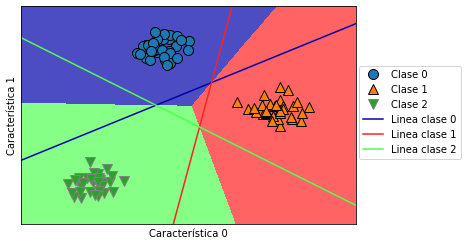

In [25]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Clase 0', 'Clase 1', 'Clase 2', 'Linea clase 0', 'Linea clase 1',
            'Linea clase 2'], loc=(1.01, 0.3))
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")